# 小波变换

## 介绍
对于不稳定的信号，难以用普通的FFT分析出频域随时间变化的信息。所以对于不同时间段的频域函数进行分析，利用小波作为基函数，各个小波函数按照不同比例系数展开得到的，其中小波函数可更改中心频率和带宽。

## 操作
将欧拉函数置换成小波函数，小波函数随着原信号会发生变化。

小波变换公式：
$$F(τ,s) = \frac{1}{\sqrt{|s|}} \int_{-\infty}^{\infty} f(t) ψ^*(\frac{t-τ}{s}) dt$$

## STFT与小波变换对比

**STFT分析的窗函数是固定时长，相同窗长分帧的过程使频率分辨率就会降低。因分帧也就是加窗的过程，由于窗函数长度有限的，会造成截断。窗函数长，则时间分辨率低，而频率分辨率高；窗函数短，则频率分辨率低，而时间分辨率高。**

**小波变换通过更改小波函数的常宽，设置不同的基频，因此不同频段利用不同的分辨率。**

**在低频成分用高的频率分辨率；高频成分用高的时间分辨率。**

In [36]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
import librosa
from scipy import signal

In [50]:
def continuous_wavelet_transform(waveform, sample_rate, wavelet='cmor', scales=None):
    """
    计算音频信号的连续小波变换（CWT）。

    参数:
    waveform (numpy.ndarray): 音频信号，形状为 (n_samples,)。
    sample_rate (int): 音频采样率，单位为 Hz。
    wavelet (str): 小波基函数名称，默认为 'cmor' (复Morlet小波)。
                  常用选项: 'cmor', 'cgau', 'shan', 'fbsp'
    scales (numpy.ndarray): 尺度参数数组，如果为None则自动生成。

    返回:
    tuple: (coefficients, frequencies)
           coefficients: 小波系数矩阵，形状为 (n_scales, n_samples)
           frequencies: 对应的频率数组
    """
    if scales is None:
        # 生成对数分布的尺度
        scales = np.logspace(np.log10(1), np.log10(sample_rate/2000), 100)
    
    # 执行连续小波变换
    coefficients, frequencies = pywt.cwt(waveform, scales, wavelet, 1.0/sample_rate)
    
    return coefficients, frequencies

In [46]:
def plot_cwt_spectrogram(coefficients, frequencies, sample_rate, title='continuous wavelet transform spectrogram'):
    """
    绘制连续小波变换的时频图。

    参数:
    coefficients (numpy.ndarray): 小波系数矩阵。
    frequencies (numpy.ndarray): 频率数组。
    sample_rate (int): 采样率。
    title (str): 图像标题。
    """
    plt.figure(figsize=(12, 8))
    
    # 计算时间轴
    time = np.linspace(0, coefficients.shape[1] / sample_rate, coefficients.shape[1])
    
    # 绘制时频图
    plt.imshow(np.abs(coefficients), aspect='auto', origin='lower', 
               extent=[time[0], time[-1], frequencies[0], frequencies[-1]],
               cmap='viridis')
    
    plt.colorbar(label='Wavelet Coefficient')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title(title)
    plt.yscale('log')  # 使用对数刻度显示频率
    plt.tight_layout()
    plt.show()

CWT系数矩阵形状: (100, 44100)
频率范围: 2000.00 - 22050.00 Hz


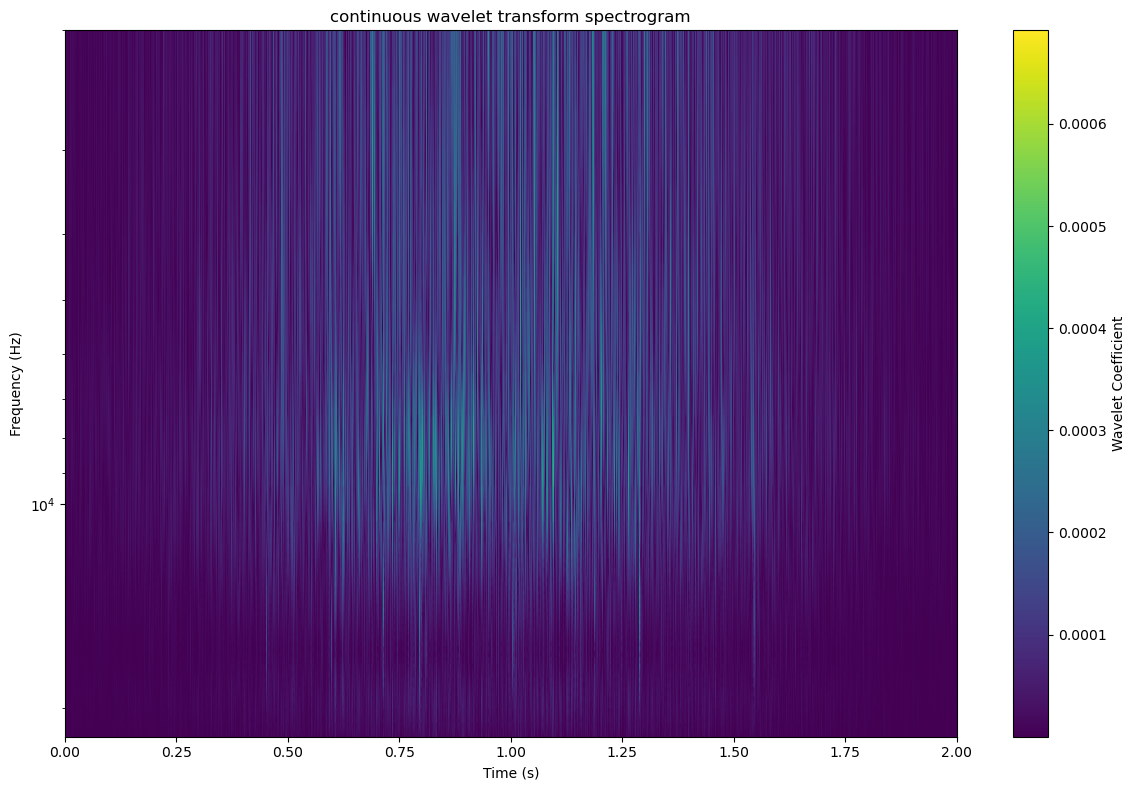

In [ ]:
# 音频文件路径
audio_file = r'E:\数据集\ShipEar\data_preprocessing\3_Frame_Windows_2s_50%\6__10_07_13_marDeCangas_Entra_18.wav'

waveform, sample_rate = librosa.load(audio_file, sr=22050)

frame_length = 2048
hop_length = 512

# 获取CWT系数
coefficients, frequencies = continuous_wavelet_transform(waveform, sample_rate, wavelet='cmor1.5-1.0')

print(f'CWT系数矩阵形状: {coefficients.shape}')
print(f'频率范围: {frequencies.min():.2f} - {frequencies.max():.2f} Hz')

# 绘制时频图
plot_cwt_spectrogram(coefficients, frequencies, sample_rate)